## Red Neuronal Básica en Pytorch

#### Preprocesamiento y carga de los datos

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

##### Cargar los datos

In [51]:
xy_train = torchvision.datasets.MNIST(root=r'C:\Users\USER\Pictures\DeepLearningDatabases', train=True, download=True, transform=torchvision.transforms.ToTensor())

##### Preprocesamiento

Hiperparámetros

In [52]:
BATCH_SIZE = 64
EPOCHS = 10

Visualizar Datos

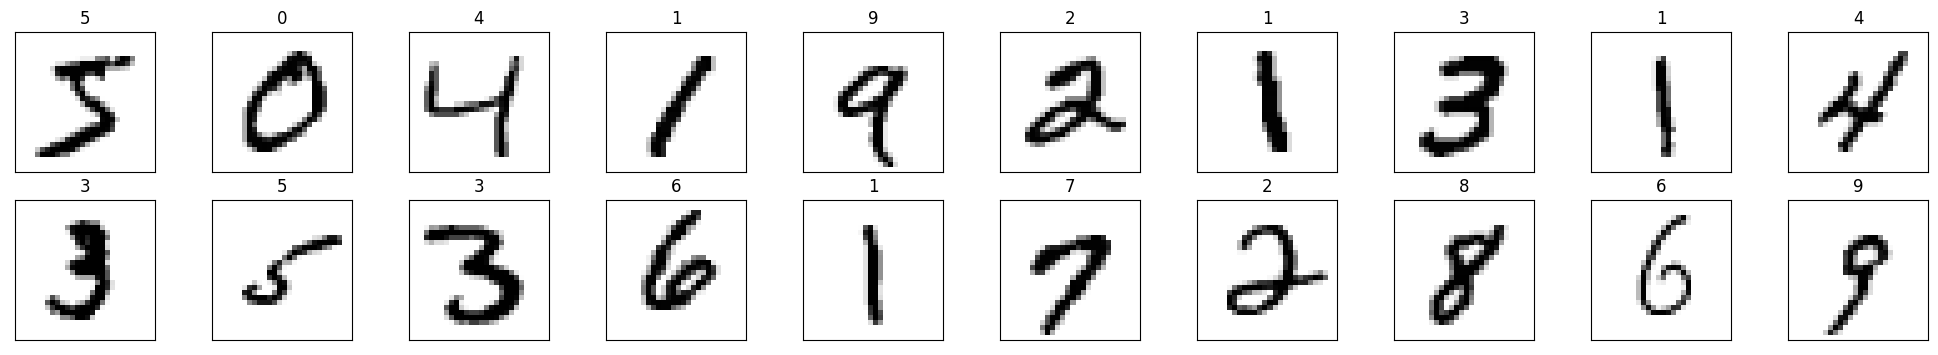

In [53]:
# Clase 'Dataloader' para poder iterar sobre los datos y facilitar su uso
xy_train_loader = torch.utils.data.DataLoader(xy_train, batch_size=BATCH_SIZE, shuffle=True)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
    image, label = xy_train_loader.dataset[idx]
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(torch.squeeze(image, dim=0).numpy(), cmap=plt.cm.binary)
    ax.set_title(str(label))

#### Red Neuronal

##### Definir modelo

Modelo

In [54]:
model = torch.nn.Sequential(
    torch.nn.Linear(784,10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10,10),
    torch.nn.LogSoftmax(dim=1)
)

Función de pérdida

In [55]:
# Función de pérdida que se usará
criterion = torch.nn.NLLLoss()

Optimizador

In [56]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

##### Entrenamiento

In [57]:
for e in range(EPOCHS):
    running_loss = 0
    for images, labels in xy_train_loader:
        images = images.view(images.shape[0], -1) # Aplanar las imágenes
        output = model(images)
        loss = criterion(output, labels) # Calcular error
        loss.backward()                  # Calcular gradientes
        optimizer.step()                 # Actualizar pesos usando el gradiente
        optimizer.zero_grad()            # Colocar a cero los gradientes nuevamente
        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(xy_train_loader)))

Epoch 0 - Training loss: 2.203207279319194
Epoch 1 - Training loss: 1.911901912836632
Epoch 2 - Training loss: 1.592931249121359
Epoch 3 - Training loss: 1.3296696162427157
Epoch 4 - Training loss: 1.1346284496123349
Epoch 5 - Training loss: 0.9894764879619135
Epoch 6 - Training loss: 0.8781169454044879
Epoch 7 - Training loss: 0.7907402814705489
Epoch 8 - Training loss: 0.7212570596224209
Epoch 9 - Training loss: 0.6655301541280645


#### Evaluar el Modelo

In [58]:
xy_test = torchvision.datasets.MNIST(root=r'C:\Users\USER\Pictures\DeepLearningDatabases', train=False, download=True, transform=torchvision.transforms.ToTensor())
xy_test_loader = torch.utils.data.DataLoader(xy_test, batch_size=BATCH_SIZE, shuffle=True)
correct_count, all_count = 0, 0

for images, labels in xy_test_loader: # Iterar sobre cada batch
    for i in range(len(labels)): # Iterar sobre cada imagen en el batch
        img = images[i].view(1, 784)
        logps = model(img)
        ps = torch.exp(logps)               # Debido a que se usó 'LogSoftmax' en la salida, se debe usar 'exp' para obtener las probabilidades
        probab = list(ps.detach().numpy()[0]) # Convertir de tensor a lista
        pred_label = probab.index(max(probab)) # Obtener el índice del valor más alto (o sea el número predicho)
        true_label = labels.numpy()[i]
        if true_label == pred_label:
            correct_count += 1
        all_count += 1
print("\Accuracy of the model = ", correct_count/all_count)

\Accuracy of the model =  0.8728
